In [ ]:
!pip install scikit-image

In [ ]:
!pip install install scikit-learn
!pip install matplotlib
!pip install numpy
!pip install pandas
!pip install tensorflow

# AutoEncoder

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Dense
from tensorflow.keras import Sequential

## 데이터 로딩

In [ ]:
# MNIST 로딩 (라벨은 필요없기 때문에 버림)
(train_x, _), (test_x, _) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
# 데이터 정규화
train_x = train_x.astype('float32') / 255.
test_x = test_x.astype('float32') / 255.


In [ ]:
train_x = np.reshape(train_x, (len(train_x), 784))
test_x = np.reshape(test_x, (len(test_x), 784))


## 영상 보기

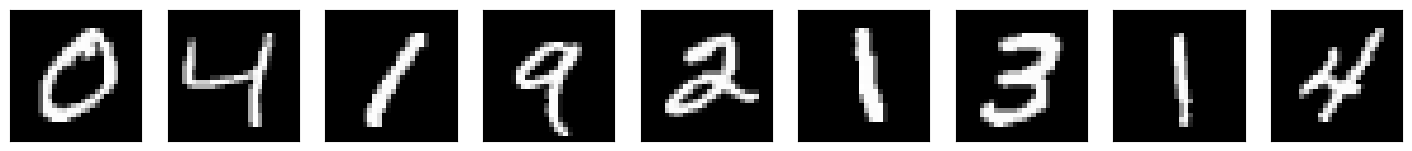

In [ ]:
n = 10
plt.figure(figsize=(20, 2))
for i in range(1,n):
    ax = plt.subplot(1, n, i)
    plt.imshow(train_x[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

## 모델 정의와 학습 실행

In [ ]:
# 모형 구성
model = Sequential()
model.add(Dense(128, activation='relu', input_dim=784))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(784, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy')


# 모형 학습
model.fit(train_x, train_x, epochs=100, batch_size=256)


Epoch 1/100
235/235 [==============================] - 10s 8ms/step - loss: 0.2425
Epoch 2/100
235/235 [==============================] - 2s 9ms/step - loss: 0.1501
Epoch 3/100
235/235 [==============================] - 2s 7ms/step - loss: 0.1295
Epoch 4/100
235/235 [==============================] - 1s 6ms/step - loss: 0.1201
Epoch 5/100
235/235 [==============================] - 1s 6ms/step - loss: 0.1153
Epoch 6/100
235/235 [==============================] - 1s 5ms/step - loss: 0.1116
Epoch 7/100
235/235 [==============================] - 1s 4ms/step - loss: 0.1087
Epoch 8/100
235/235 [==============================] - 1s 4ms/step - loss: 0.1062
Epoch 9/100
235/235 [==============================] - 1s 4ms/step - loss: 0.1039
Epoch 10/100
235/235 [==============================] - 1s 4ms/step - loss: 0.1017
Epoch 11/100
235/235 [==============================] - 1s 4ms/step - loss: 0.1000
Epoch 12/100
235/235 [==============================] - 1s 4ms/step - loss: 0.0989
Epoch 13/100

## 결과 확인

313/313 [==============================] - 1s 2ms/step


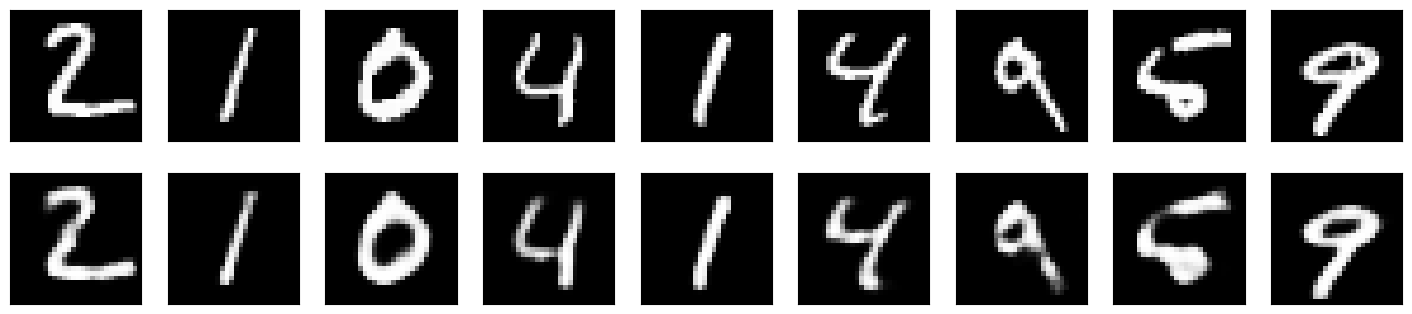

In [ ]:
reconstruted = model.predict(test_x)

n = 10
plt.figure(figsize=(20, 6))
for i in range(1,n):
    # 원본 표시
    ax = plt.subplot(3, n, i)
    plt.imshow(test_x[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)


    # 출력된 것
    ax = plt.subplot(3, n, i + n)
    plt.imshow(reconstruted[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()

## AutoEncoder 사용한 노이즈 제거

In [ ]:
# MNIST 로딩 (라벨은 필요없기 때문에 버림)
(train_x, _), (test_x, _) = mnist.load_data()

In [ ]:
# 데이터 정규화
train_x = train_x.astype('float32') / 255.
test_x = test_x.astype('float32') / 255.

In [ ]:
train_x = np.reshape(train_x, (len(train_x), 784))
test_x = np.reshape(test_x, (len(test_x), 784))

In [ ]:
noise = np.random.normal(loc=0.0, scale=1.0, size=10000)

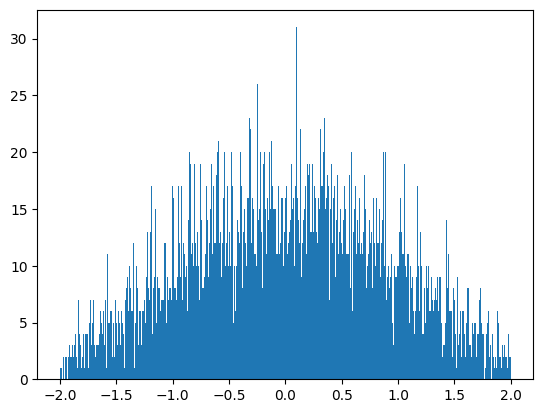

In [ ]:
plt.hist(noise, bins=1000, range=(-2., 2.))
plt.show()

In [ ]:
# 원본데이터에 Noise 추가
noise_factor = 0.5
train_x_noisy = train_x + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=train_x.shape)
test_x_noisy = test_x + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=test_x.shape)

# 최대가 1, 최소가 0이 되도록
train_x_noisy = np.clip(train_x_noisy, 0., 1.)
test_x_noisy = np.clip(test_x_noisy, 0., 1.)

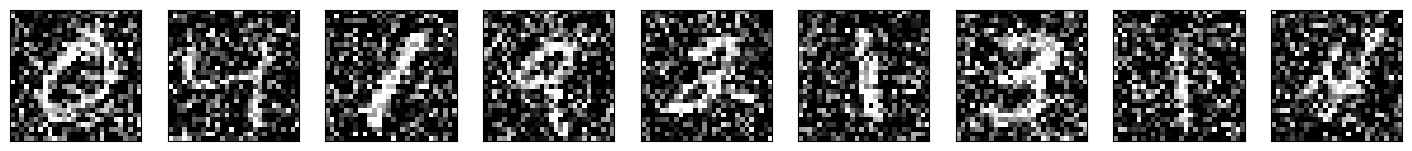

In [ ]:
# Noise가 추가된 데이터 확인
n = 10
plt.figure(figsize=(20, 2))
for i in range(1,n):
    ax = plt.subplot(1, n, i)
    plt.imshow(train_x_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [ ]:
# 모형 구성
model = Sequential()
model.add(Dense(128, activation='relu', input_dim=784))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(784, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy')


# 모형 학습
model.fit(train_x_noisy, train_x, epochs=100, batch_size=256, validation_split=0.1, shuffle=True)

Epoch 1/100
211/211 [==============================] - 4s 8ms/step - loss: 0.2653 - val_loss: 0.2031
Epoch 2/100
211/211 [==============================] - 1s 4ms/step - loss: 0.1844 - val_loss: 0.1734
Epoch 3/100
211/211 [==============================] - 1s 5ms/step - loss: 0.1670 - val_loss: 0.1618
Epoch 4/100
211/211 [==============================] - 1s 5ms/step - loss: 0.1576 - val_loss: 0.1545
Epoch 5/100
211/211 [==============================] - 1s 4ms/step - loss: 0.1507 - val_loss: 0.1490
Epoch 6/100
211/211 [==============================] - 1s 4ms/step - loss: 0.1460 - val_loss: 0.1451
Epoch 7/100
211/211 [==============================] - 1s 5ms/step - loss: 0.1427 - val_loss: 0.1424
Epoch 8/100
211/211 [==============================] - 1s 4ms/step - loss: 0.1397 - val_loss: 0.1395
Epoch 9/100
211/211 [==============================] - 1s 5ms/step - loss: 0.1367 - val_loss: 0.1366
Epoch 10/100
211/211 [==============================] - 1s 5ms/step - loss: 0.1343 - val_lo

313/313 [==============================] - 1s 2ms/step


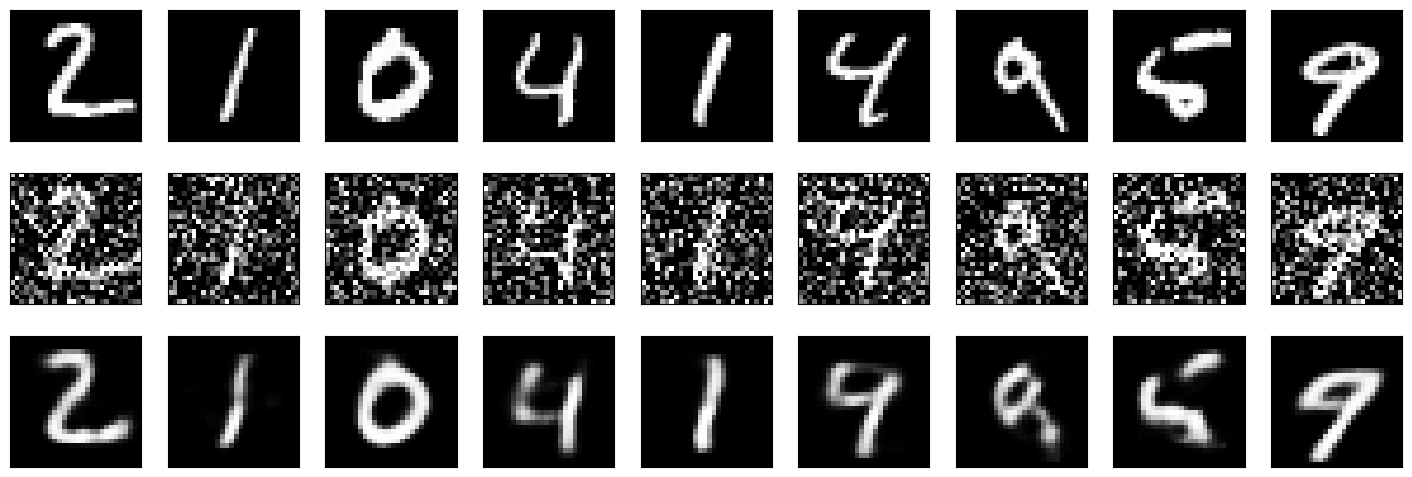

In [ ]:
decoded_imgs = model.predict(test_x_noisy)

n = 10
plt.figure(figsize=(20, 6))
for i in range(1,n):
    # 원본 표시
    ax = plt.subplot(3, n, i)
    plt.imshow(test_x[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # 노이즈 첨가 된 것
    ax = plt.subplot(3, n, i + n)
    plt.imshow(test_x_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # 노이즈 제거 된 것
    ax = plt.subplot(3, n, i + 2*n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()

# AutoEncoder 사용한 해상도 증대

In [ ]:
# MNIST 로딩 (라벨은 필요없기 때문에 버림)
(train_x, _), (test_x, _) = mnist.load_data()

In [ ]:
# 데이터 정규화 및 Reshape
train_x = train_x.astype('float32') / 255.
test_x = test_x.astype('float32') / 255.

In [ ]:
def shrink(data, rows, cols):
    return data.reshape(data.shape[0], rows, int(data.shape[1]/rows), cols, int(data.shape[2]/cols)).sum(axis=2).sum(axis=3)

reduced_train_x = shrink(train_x, 14, 14)
reduced_test_x = shrink(test_x, 14, 14)
print(reduced_train_x.shape)
print(reduced_test_x.shape)


(60000, 14, 14)
(10000, 14, 14)


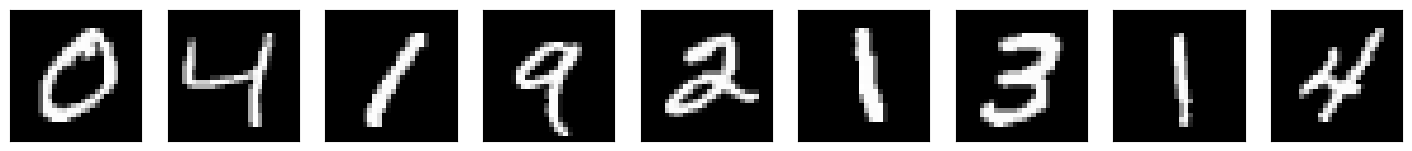

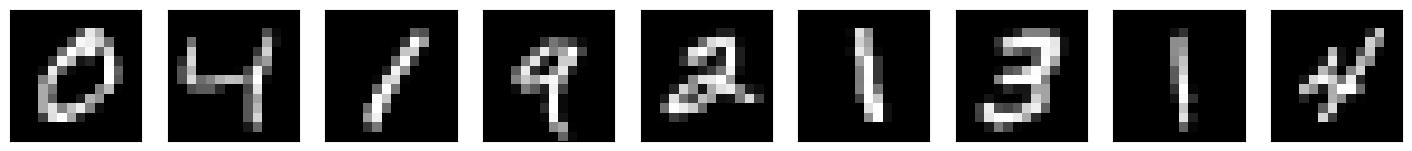

In [ ]:
n = 10

plt.figure(figsize=(20, 2))
for i in range(1,n):
    ax = plt.subplot(1, n, i)
    plt.imshow(train_x[i])
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

# 해상도 낮아진 이미지 확인
plt.figure(figsize=(20, 2))
for i in range(1,n):
    ax = plt.subplot(1, n, i)
    plt.imshow(reduced_train_x[i])
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [ ]:
reduced_train_x = reduced_train_x.reshape(reduced_train_x.shape[0], 14*14)
reduced_test_x = reduced_test_x.reshape(reduced_test_x.shape[0], 14*14)
train_x = train_x.reshape(train_x.shape[0], 28*28)
test_x = test_x.reshape(test_x.shape[0], 28*28)

In [ ]:
print(reduced_train_x.shape)
print(train_x.shape)
print(reduced_test_x.shape)
print(test_x.shape)

(60000, 196)
(60000, 784)
(10000, 196)
(10000, 784)


In [ ]:
# 모델 정의
model = Sequential()

model.add(Dense(128, activation='relu', input_dim=14*14))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(784, activation='sigmoid'))

model.compile(optimizer='adam', loss='mse')

# 모델 학습
model.fit(reduced_train_x, train_x, epochs=50, batch_size=256, validation_split=0.1)

Epoch 1/50
211/211 [==============================] - 3s 5ms/step - loss: 0.0594 - val_loss: 0.0349
Epoch 2/50
211/211 [==============================] - 1s 6ms/step - loss: 0.0294 - val_loss: 0.0249
Epoch 3/50
211/211 [==============================] - 1s 6ms/step - loss: 0.0232 - val_loss: 0.0212
Epoch 4/50
211/211 [==============================] - 1s 5ms/step - loss: 0.0200 - val_loss: 0.0185
Epoch 5/50
211/211 [==============================] - 1s 4ms/step - loss: 0.0178 - val_loss: 0.0170
Epoch 6/50
211/211 [==============================] - 1s 4ms/step - loss: 0.0164 - val_loss: 0.0157
Epoch 7/50
211/211 [==============================] - 1s 4ms/step - loss: 0.0153 - val_loss: 0.0149
Epoch 8/50
211/211 [==============================] - 1s 4ms/step - loss: 0.0145 - val_loss: 0.0141
Epoch 9/50
211/211 [==============================] - 1s 4ms/step - loss: 0.0139 - val_loss: 0.0137
Epoch 10/50
211/211 [==============================] - 1s 4ms/step - loss: 0.0135 - val_loss: 0.0133

313/313 [==============================] - 1s 2ms/step


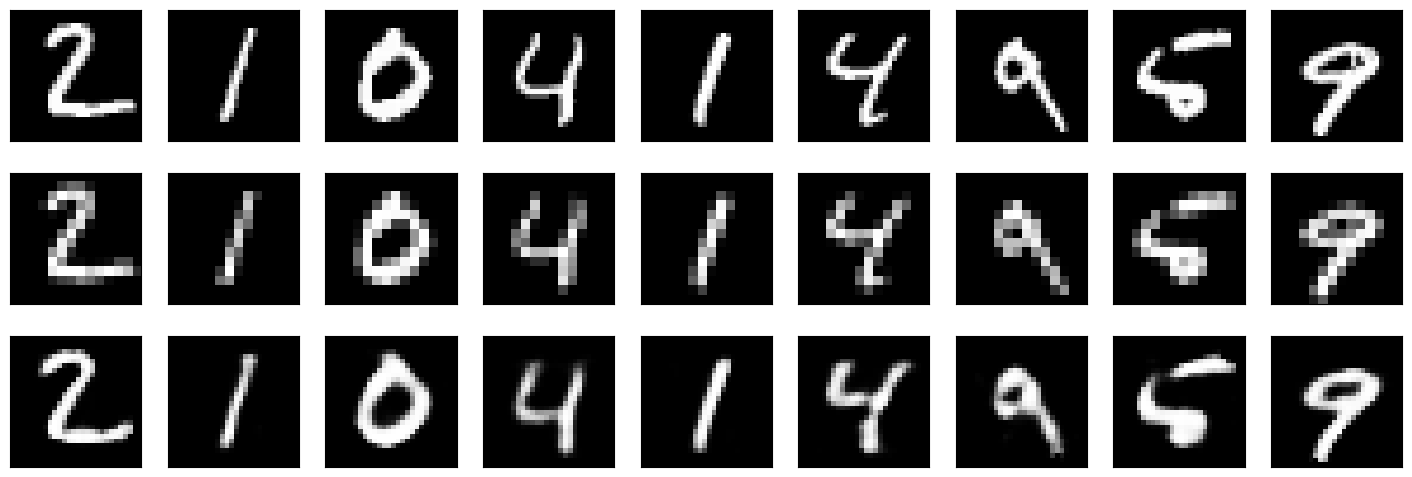

In [ ]:
# 결과 확인
super_resolutioned = model.predict(reduced_test_x)

n = 10
plt.figure(figsize=(20, 6))
for i in range(1, n):
    # display original
    ax = plt.subplot(3, n, i)
    plt.imshow(test_x[i].reshape(28,28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reduced
    ax = plt.subplot(3, n, i + n)
    plt.imshow(reduced_test_x[i].reshape(14,14))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display super resolution
    ax = plt.subplot(3, n, i + 2*n)
    plt.imshow(super_resolutioned[i].reshape(28,28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()

# U-Net 사용한 영역 분할

In [ ]:
!rm -rf Lung_Segmentation.zip
!wget https://raw.githubusercontent.com/RowanCompany/2024_AI_workshop/main/material/data/Lung_Segmentation.zip -O Lung_Segmentation.zip

--2024-06-28 10:17:57--  https://github.com/medicieducation/trainingcourse/raw/main/bigdata/deeplearning/material/deep_learning/Lung_Segmentation.zip
Resolving github.com (github.com)... 140.82.116.3
Connecting to github.com (github.com)|140.82.116.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/medicieducation/trainingcourse/main/bigdata/deeplearning/material/deep_learning/Lung_Segmentation.zip [following]
--2024-06-28 10:17:57--  https://raw.githubusercontent.com/medicieducation/trainingcourse/main/bigdata/deeplearning/material/deep_learning/Lung_Segmentation.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.108.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 37648324 (36M) [application/zip]
Saving to: ‘Lung_Segmentation.zip’

Lung_Segment

In [ ]:
!rm -rf Lung_Segmentation
!unzip Lung_Segmentation.zip

Archive:  Lung_Segmentation.zip
   creating: Lung_Segmentation/
   creating: Lung_Segmentation/image/
  inflating: Lung_Segmentation/image/CHNCXR_0001_0.png  
  inflating: Lung_Segmentation/image/CHNCXR_0002_0.png  
  inflating: Lung_Segmentation/image/CHNCXR_0003_0.png  
  inflating: Lung_Segmentation/image/CHNCXR_0004_0.png  
  inflating: Lung_Segmentation/image/CHNCXR_0005_0.png  
  inflating: Lung_Segmentation/image/CHNCXR_0006_0.png  
  inflating: Lung_Segmentation/image/CHNCXR_0007_0.png  
  inflating: Lung_Segmentation/image/CHNCXR_0008_0.png  
  inflating: Lung_Segmentation/image/CHNCXR_0009_0.png  
  inflating: Lung_Segmentation/image/CHNCXR_0010_0.png  
  inflating: Lung_Segmentation/image/CHNCXR_0011_0.png  
  inflating: Lung_Segmentation/image/CHNCXR_0012_0.png  
  inflating: Lung_Segmentation/image/CHNCXR_0013_0.png  
  inflating: Lung_Segmentation/image/CHNCXR_0014_0.png  
  inflating: Lung_Segmentation/image/CHNCXR_0015_0.png  
  inflating: Lung_Segmentation/image/CHNCXR

## 풀린 데이터 파일 구조

```
Lung_segmentaiton/
  image/
    CHNCXR_0001_0.png
    CHNCXR_0002_0.png
    ...
  label/
    CHNCXR_0001_0.png
    CHNCXR_0002_0.png
    ...
```

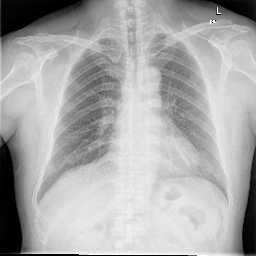

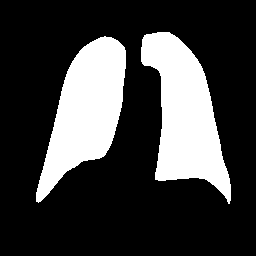

In [ ]:
from IPython.display import Image, display

display(Image('./Lung_Segmentation/image/CHNCXR_0001_0.png'))
display(Image('./Lung_Segmentation/label/CHNCXR_0001_0.png'))


In [ ]:
import numpy as np
import os

from skimage.io import imread
from skimage.transform import resize
from sklearn.model_selection import train_test_split

IMG_WIDTH = 256
IMG_HEIGHT = 256
IMG_CHANNELS = 3

data_path = "Lung_Segmentation"

files = os.listdir(os.path.join(data_path, 'image'))
# files = ['CHNCXR_0402_1.png', 'CHNCXR_0461_1.png', 'CHNCXR_0422_1.png', ... ]


raw_x = []
raw_y = []
for file_name in files:
    # file_name = "CHNCXR_0402_1"

    # input_file = "./Lung_Segmentation/image/CHNCXR_0402_1.png"
    input_file = os.path.join(data_path, 'image', file_name)
    # output_file = "./Lung_Segmentation/label/CHNCXR_0402_1.png"
    output_file = os.path.join(data_path, 'label', file_name)

    image = imread(input_file)[:,:,:IMG_CHANNELS]
    # image.shape = (256, 256, 3)

    label = imread(output_file)
    # label.shape = (256, 256)

    label = np.expand_dims(label, axis=-1)
    # label.shape = (256, 256, 1)

    raw_x.append(image)
    raw_y.append(label)

raw_x = np.array(raw_x)
raw_y = np.array(raw_y)

In [ ]:
print(raw_x[0])
print(raw_y[0])

[[[ 50  50  50]
  [ 48  48  48]
  [ 56  56  56]
  ...
  [ 41  41  41]
  [ 39  39  39]
  [ 41  41  41]]

 [[ 35  35  35]
  [ 34  34  34]
  [ 36  36  36]
  ...
  [ 34  34  34]
  [ 37  37  37]
  [ 31  31  31]]

 [[ 26  26  26]
  [ 30  30  30]
  [ 27  27  27]
  ...
  [ 26  26  26]
  [ 27  27  27]
  [ 28  28  28]]

 ...

 [[ 11  11  11]
  [  8   8   8]
  [ 10  10  10]
  ...
  [  0   0   0]
  [254 254 254]
  [ 14  14  14]]

 [[  9   9   9]
  [  8   8   8]
  [  8   8   8]
  ...
  [255 255 255]
  [251 251 251]
  [247 247 247]]

 [[  9   9   9]
  [  9   9   9]
  [  9   9   9]
  ...
  [137 137 137]
  [255 255 255]
  [125 125 125]]]
[[[0]
  [0]
  [0]
  ...
  [0]
  [0]
  [0]]

 [[0]
  [0]
  [0]
  ...
  [0]
  [0]
  [0]]

 [[0]
  [0]
  [0]
  ...
  [0]
  [0]
  [0]]

 ...

 [[0]
  [0]
  [0]
  ...
  [0]
  [0]
  [0]]

 [[0]
  [0]
  [0]
  ...
  [0]
  [0]
  [0]]

 [[0]
  [0]
  [0]
  ...
  [0]
  [0]
  [0]]]


In [ ]:
x = (raw_x / 255).astype(float)
y = (raw_y / 255).astype(int)

In [ ]:
print(np.min(x), np.max(x))
print(np.min(y), np.max(y))

0.0 1.0
0 1


In [ ]:
split_index = int(x.shape[0]*0.8)
train_x, test_x = x[:split_index], x[split_index:]
train_y, test_y = y[:split_index], y[split_index:]

train


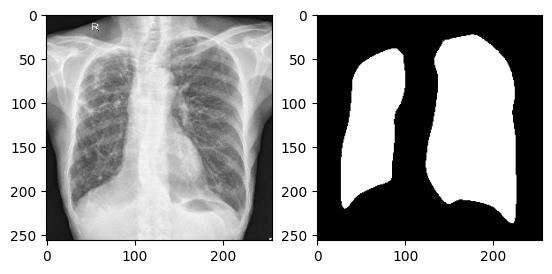

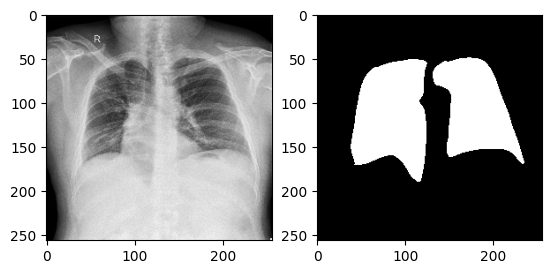

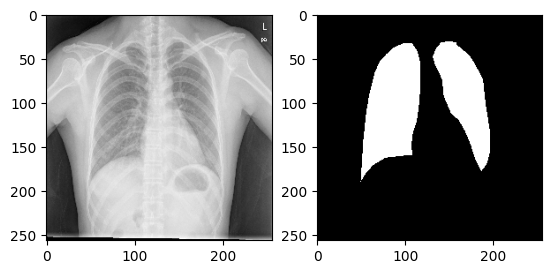

test


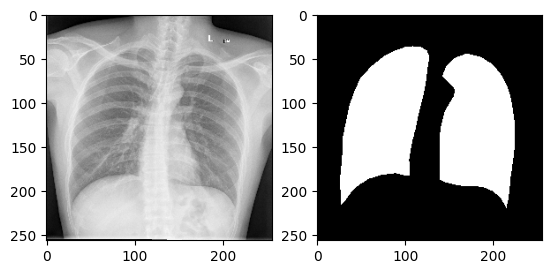

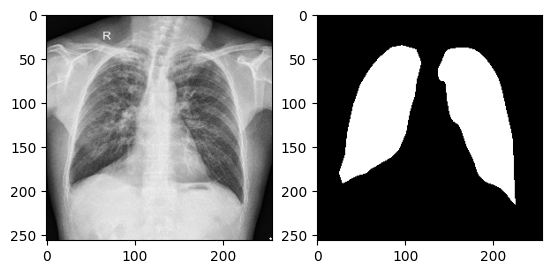

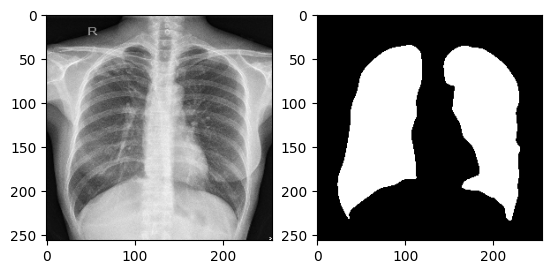

In [ ]:
import matplotlib.pyplot as plt

def plotTrainData(x, y, set_type):
    print(set_type)
    for i in range(3):
        ix = np.random.randint(0, len(x))
        plt.subplot(1,2,1)
        plt.imshow(x[ix])

        plt.subplot(1,2,2)
        plt.imshow(np.squeeze(y[ix]), 'gray') # np.squeeze()는 (256,26,1)을 (256,256)으로 변환
        plt.show()

plotTrainData(train_x, train_y, 'train')
plotTrainData(test_x, test_y, 'test')


In [ ]:
from tensorflow.keras import Model
from tensorflow.keras.layers import Input, Conv2D, BatchNormalization, MaxPooling2D, Conv2DTranspose, concatenate
from tensorflow.keras import backend as keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint, LearningRateScheduler

def unet(input_size=(256,256,3)):
    inputs = Input(input_size)

    conv1 = Conv2D(32, (3, 3), activation='relu', padding='same')(inputs)
    conv1 = BatchNormalization()(conv1)
    conv1 = Conv2D(32, (3, 3), activation='relu', padding='same')(conv1)
    conv1 = BatchNormalization()(conv1)
    pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)

    conv2 = Conv2D(64, (3, 3), activation='relu', padding='same')(pool1)
    conv2 = BatchNormalization()(conv2)
    conv2 = Conv2D(64, (3, 3), activation='relu', padding='same')(conv2)
    conv2 = BatchNormalization()(conv2)
    pool2 = MaxPooling2D(pool_size=(2, 2))(conv2)

    conv3 = Conv2D(128, (3, 3), activation='relu', padding='same')(pool2)
    conv3 = BatchNormalization()(conv3)
    conv3 = Conv2D(128, (3, 3), activation='relu', padding='same')(conv3)
    conv3 = BatchNormalization()(conv3)
    pool3 = MaxPooling2D(pool_size=(2, 2))(conv3)

    conv4 = Conv2D(256, (3, 3), activation='relu', padding='same')(pool3)
    conv4 = BatchNormalization()(conv4)
    conv4 = Conv2D(256, (3, 3), activation='relu', padding='same')(conv4)
    conv4 = BatchNormalization()(conv4)
    pool4 = MaxPooling2D(pool_size=(2, 2))(conv4)

    conv5 = Conv2D(512, (3, 3), activation='relu', padding='same')(pool4)
    conv5 = BatchNormalization()(conv5)
    conv5 = Conv2D(512, (3, 3), activation='relu', padding='same')(conv5)
    conv5 = BatchNormalization()(conv5)

    up = Conv2DTranspose(256, (2, 2), strides=(2, 2), padding='same')(conv5)
    up6 = concatenate([up, conv4], axis=3)
    conv6 = Conv2D(256, (3, 3), activation='relu', padding='same')(up6)
    conv6 = BatchNormalization()(conv6)
    conv6 = Conv2D(256, (3, 3), activation='relu', padding='same')(conv6)
    conv6 = BatchNormalization()(conv6)

    up = Conv2DTranspose(128, (2, 2), strides=(2, 2), padding='same')(conv6)
    up7 = concatenate([up, conv3], axis=3)
    conv7 = Conv2D(128, (3, 3), activation='relu', padding='same')(up7)
    conv7 = BatchNormalization()(conv7)
    conv7 = Conv2D(128, (3, 3), activation='relu', padding='same')(conv7)
    conv7 = BatchNormalization()(conv7)

    up = Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same')(conv7)
    up8 = concatenate([up, conv2], axis=3)
    conv8 = Conv2D(64, (3, 3), activation='relu', padding='same')(up8)
    conv8 = BatchNormalization()(conv8)
    conv8 = Conv2D(64, (3, 3), activation='relu', padding='same')(conv8)
    conv8 = BatchNormalization()(conv8)

    up = Conv2DTranspose(32, (2, 2), strides=(2, 2), padding='same')(conv8)
    up9 = concatenate([up, conv1], axis=3)
    conv9 = Conv2D(32, (3, 3), activation='relu', padding='same')(up9)
    conv9 = BatchNormalization()(conv9)
    conv9 = Conv2D(32, (3, 3), activation='relu', padding='same')(conv9)
    conv9 = BatchNormalization()(conv9)

    conv10 = Conv2D(1, (1, 1), activation='sigmoid')(conv9)

    return Model(inputs=[inputs], outputs=[conv10])

In [ ]:
# 모델 생성
model = unet()

# 모델 컴파일
model.compile(loss="binary_crossentropy", optimizer="Adam", metrics=['accuracy'])

# 학습
hist = model.fit(train_x, train_y, validation_split=0.2, epochs=100, batch_size=32, verbose=1)


Epoch 1/100
12/12 [==============================] - 70s 3s/step - loss: 0.3958 - accuracy: 0.8507 - val_loss: 0.6465 - val_accuracy: 0.6323
Epoch 2/100
12/12 [==============================] - 8s 710ms/step - loss: 0.1539 - accuracy: 0.9642 - val_loss: 0.8761 - val_accuracy: 0.4874
Epoch 3/100
12/12 [==============================] - 8s 693ms/step - loss: 0.1088 - accuracy: 0.9732 - val_loss: 2.4851 - val_accuracy: 0.5207
Epoch 4/100
12/12 [==============================] - 8s 691ms/step - loss: 0.0899 - accuracy: 0.9766 - val_loss: 0.6333 - val_accuracy: 0.7513
Epoch 5/100
12/12 [==============================] - 8s 679ms/step - loss: 0.0801 - accuracy: 0.9777 - val_loss: 0.5921 - val_accuracy: 0.7825
Epoch 6/100
12/12 [==============================] - 8s 674ms/step - loss: 0.0760 - accuracy: 0.9776 - val_loss: 0.8732 - val_accuracy: 0.7420
Epoch 7/100
12/12 [==============================] - 8s 681ms/step - loss: 0.0734 - accuracy: 0.9777 - val_loss: 0.9117 - val_accuracy: 0.7420
E

In [ ]:
import matplotlib.pyplot as plt

def plotPredictions(model, train_x, train_y, test_x, test_y):

    ix = np.random.randint(0, len(train_x))

    input_ = train_x[ix:ix+1]
    mask_ = train_y[ix:ix+1]

    preds_train = model.predict(input_)
    preds_train_t = (preds_train > 0.5).astype(np.uint8)

    plt.figure(figsize=(10,10))
    plt.subplot(1,3,1)
    plt.title("train_x")
    plt.axis('off')
    plt.imshow(input_[0])
    plt.subplot(1,3,2)
    plt.title("train_y")
    plt.axis('off')
    plt.imshow(mask_[0][:,:,0], 'gray')
    plt.subplot(1,3,3)
    ret = model.evaluate(input_, mask_)
    plt.title("Prediction: %.4f" % (ret[1]))
    plt.axis('off')
    plt.imshow(preds_train_t[0][:,:,0], 'gray')
    plt.show()

    ix = np.random.randint(0, len(test_x))
    input_ = test_x[ix:ix+1]
    mask_ = test_y[ix:ix+1]
    preds_test = model.predict(input_)
    preds_test_t = (preds_test > 0.5).astype(np.uint8)

    plt.figure(figsize=(10,10))
    plt.subplot(1,3,1)
    plt.title("X_test")
    plt.axis('off')
    plt.imshow(input_[0])
    plt.subplot(1,3,2)
    plt.title("test_y")
    plt.axis('off')
    plt.imshow(mask_[0][:,:,0], 'gray')
    plt.subplot(1,3,3)
    ret = model.evaluate(input_, mask_)
    plt.title("Prediction: %.4f" % (ret[1]))
    plt.axis('off')
    plt.imshow(preds_test_t[0][:,:,0], 'gray')
    plt.show()

1/1 [==============================] - 0s 45ms/step - loss: 0.0103 - accuracy: 0.9957


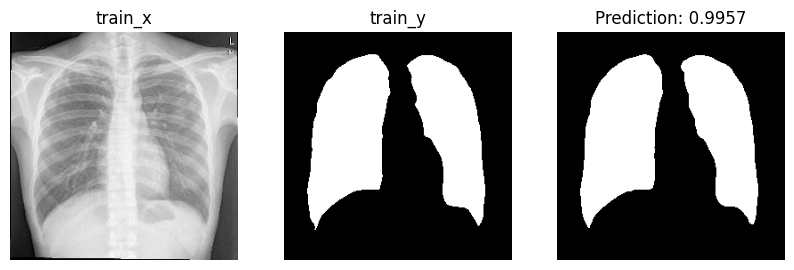

1/1 [==============================] - 0s 44ms/step - loss: 0.0899 - accuracy: 0.9831


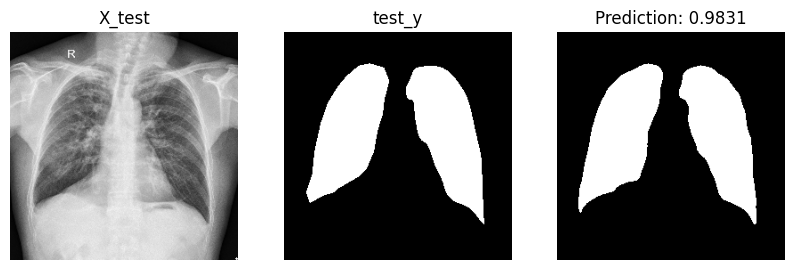

In [ ]:
plotPredictions(model, train_x, train_y, test_x, test_y)